In [11]:
# Import MLflow
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")


In [12]:
# 
import mlflow.sklearn
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

mlflow.set_experiment("Diabetes")
mlflow.sklearn.autolog(registered_model_name="Diabetes")

In [13]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [14]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

2023/08/03 01:03:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eb38c7af366f4b9eb6e289ea6fd83d13', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
Successfully registered model 'Diabetes'.
2023/08/03 01:03:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Diabetes, version 1
Created version '1' of model 'Diabetes'.


LinearRegression()

In [15]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [16]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


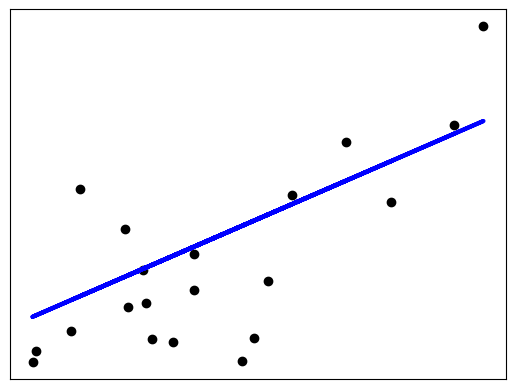

In [17]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("data/Salary_predict.csv")
X = df [["experience", "age", "interview_score"]]
y = df[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Salary_predict.csv'